In [ ]:
# Loads the data from AWS to Colab
!wget https://dphi-live.s3.eu-west-1.amazonaws.com/dataset/standford_cars.zip

# Unzip our data
!unzip standford_cars.zip

--2021-09-18 16:19:23--  https://dphi-live.s3.eu-west-1.amazonaws.com/dataset/standford_cars.zip
Resolving dphi-live.s3.eu-west-1.amazonaws.com (dphi-live.s3.eu-west-1.amazonaws.com)... 52.218.106.40
Connecting to dphi-live.s3.eu-west-1.amazonaws.com (dphi-live.s3.eu-west-1.amazonaws.com)|52.218.106.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1064782271 (1015M) [application/zip]
Saving to: ‘standford_cars.zip.2’

standford_cars.zip. 100%[===================>]   1015M  11.4MB/s    in 91s     

2021-09-18 16:20:56 (11.1 MB/s) - ‘standford_cars.zip.2’ saved [1064782271/1064782271]

Archive:  standford_cars.zip
replace standford_cars/test/Image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N


In [ ]:
import pandas as pd # Data analysis and manipultion tool
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf # Deep Learning Tool
import os # OS module in Python provides a way of using operating system dependent functionality
import cv2 # Library for image processing
from sklearn.model_selection import train_test_split # For splitting the data into train and validation set

In [ ]:
train = pd.read_csv('/content/standford_cars/Training_set.csv')
test = pd.read_csv('/content/standford_cars/Testing_set.csv')

# sub = pd.read_csv('')

In [ ]:
train.head()

,filename,label
0,Image_1.jpg,Sedan
1,Image_2.jpg,Sedan
2,Image_3.jpg,Convertible
3,Image_4.jpg,Convertible
4,Image_5.jpg,Sedan


In [ ]:
train['label'].value_counts()

Sedan          1335
SUV            1006
Coupe           761
Convertible     725
Cab             503
Other           426
Hatchback       388
Wagon           204
Van             177
Minivan         175
Name: label, dtype: int64

In [ ]:
train.shape

(5700, 2)

In [ ]:
test.shape

(2444, 1)

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


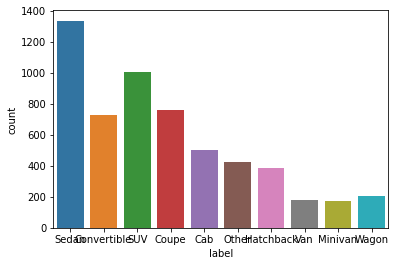

In [ ]:
sns.countplot(train["label"],data=train)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
lb=LabelEncoder()
train["label2"]=lb.fit_transform(train["label"])

In [ ]:
# train = train.drop(['food_no'],axis=1)

In [ ]:
train

,filename,label,label2
0,Image_1.jpg,Sedan,7
1,Image_2.jpg,Sedan,7
2,Image_3.jpg,Convertible,1
3,Image_4.jpg,Convertible,1
4,Image_5.jpg,Sedan,7
...,...,...,...
5695,Image_5696.jpg,Convertible,1
5696,Image_5697.jpg,Convertible,1
5697,Image_5698.jpg,Other,5
5698,Image_5699.jpg,Cab,0


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_train, X_valid = train_test_split(train, test_size=0.2,stratify=train["label"],shuffle=True)


In [ ]:
(X_train["label"].value_counts()/len(X_train))*100


Sedan          23.421053
SUV            17.653509
Coupe          13.355263
Convertible    12.719298
Cab             8.815789
Other           7.478070
Hatchback       6.798246
Wagon           3.574561
Van             3.114035
Minivan         3.070175
Name: label, dtype: float64

In [ ]:
X_train

,filename,label,label2
4046,Image_4047.jpg,SUV,6
4034,Image_4035.jpg,Sedan,7
251,Image_252.jpg,Hatchback,3
3110,Image_3111.jpg,Sedan,7
96,Image_97.jpg,Coupe,2
...,...,...,...
2538,Image_2539.jpg,Convertible,1
3621,Image_3622.jpg,Coupe,2
1781,Image_1782.jpg,Convertible,1
3308,Image_3309.jpg,Van,8


In [ ]:
(X_valid["label"].value_counts()/len(X_valid))*100


Sedan          23.421053
SUV            17.631579
Coupe          13.333333
Convertible    12.719298
Cab             8.859649
Other           7.456140
Hatchback       6.842105
Wagon           3.596491
Minivan         3.070175
Van             3.070175
Name: label, dtype: float64

In [ ]:
from keras_preprocessing.image import ImageDataGenerator


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,)


In [ ]:
train_generator=train_datagen.flow_from_dataframe(
dataframe=X_train,
directory="/content/standford_cars/train",
x_col="filename",
y_col="label",
batch_size=16,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(299,299))

Found 4560 validated image filenames belonging to 10 classes.


In [ ]:
import matplotlib.pyplot as plt



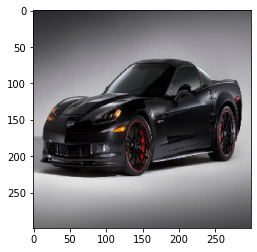

In [ ]:
x,y = train_generator.next()
for i in range(8,9):
  image = x[i]
  plt.imshow(image)
  plt.show()

In [ ]:
valid_datagen=ImageDataGenerator(rescale=1./255.,)
valid_generator=valid_datagen.flow_from_dataframe(
dataframe=X_valid,
directory="/content/standford_cars/train",
x_col="filename",
y_col="label",
batch_size=16,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(299,299))

Found 1140 validated image filenames belonging to 10 classes.


In [ ]:
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout,AveragePooling2D
from tensorflow.keras.applications.resnet import ResNet50
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3,DenseNet201,ResNet152,EfficientNetB7, MobileNetV2,Xception
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Model
from keras.models import Sequential
from keras.regularizers import *
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
data_augmentation = keras.Sequential(
[
tf.keras.layers.experimental.preprocessing.CenterCrop(224,224),
]
)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import os
import seaborn as sns
from keras_preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
import albumentations as A
from tensorflow.keras.utils import Sequence
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow
from os import listdir
import skimage.exposure

In [ ]:
inputs = keras.Input(shape=(299,299, 3))
tensor_x = data_augmentation(inputs)
resnet=InceptionResNetV2(weights="imagenet",input_tensor=tensor_x)

In [ ]:
x=resnet.layers[-2].output
fc1=Dense(10,kernel_initializer='glorot_uniform', kernel_regularizer=l2(.0005),activation='softmax')(x)
my_model=Model(inputs=resnet.input,outputs=fc1)

In [ ]:
my_model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         sequential[0][0]                 
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
checkpoint_path = "training_3/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
my_callbacks = [
ModelCheckpoint(checkpoint_path, monitor = 'val_accuracy',verbose = 1,save_weights_only=True, save_best_only = True),
EarlyStopping(monitor='val_accuracy', patience=3, verbose=0, mode='max'),
ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min',min_delta=1e-4)
]

In [ ]:
my_model.compile(optimizer =tf.keras.optimizers.Adam(learning_rate=0.00001,decay=0.0001),metrics=["accuracy"],loss= tf.keras.losses.CategoricalCrossentropy())


In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [ ]:
my_model.fit(
train_generator,
steps_per_epoch=STEP_SIZE_TRAIN,
epochs=100,
validation_data=valid_generator,
validation_steps=STEP_SIZE_VALID,callbacks=[my_callbacks])

Epoch 1/100
285/285 [==============================] - 284s 838ms/step - loss: 1.8885 - accuracy: 0.3579 - val_loss: 1.4433 - val_accuracy: 0.5264

Epoch 00001: val_accuracy improved from -inf to 0.52641, saving model to training_3/cp.ckpt
Epoch 2/100
285/285 [==============================] - 235s 825ms/step - loss: 1.2656 - accuracy: 0.5805 - val_loss: 1.2052 - val_accuracy: 0.5968

Epoch 00002: val_accuracy improved from 0.52641 to 0.59683, saving model to training_3/cp.ckpt
Epoch 3/100
285/285 [==============================] - 235s 824ms/step - loss: 0.9013 - accuracy: 0.7103 - val_loss: 1.0888 - val_accuracy: 0.6461

Epoch 00003: val_accuracy improved from 0.59683 to 0.64613, saving model to training_3/cp.ckpt
Epoch 4/100
285/285 [==============================] - 235s 823ms/step - loss: 0.6215 - accuracy: 0.8070 - val_loss: 1.0696 - val_accuracy: 0.6532

Epoch 00004: val_accuracy improved from 0.64613 to 0.65317, saving model to training_3/cp.ckpt
Epoch 5/100
285/285 [==========

In [ ]:
my_model.load_weights(checkpoint_path)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = my_model.predict(valid_generator, STEP_SIZE_VALID)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_generator.classes, y_pred))
print('Classification Report')
target_names = ['Sedan', 'SUV', 'Coupe','Convertible','Cab','Other','Hatchback','Wagon','Van','Minivan']
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[11 13 15  3  4  6 21 20  3  5]
 [13 15 20 11  2  8 37 29  4  6]
 [14 18 21  5  4 10 29 45  2  4]
 [ 6 12 13  3  2  3 11 27  0  1]
 [ 3  0  2  2  0  1  9 14  2  2]
 [ 6 14  8  5  2  4 11 27  3  5]
 [24 31 24 10  6 18 41 41  3  3]
 [19 35 37 14  9 20 43 70 11  9]
 [ 2  4  5  1  1  2 10  8  0  2]
 [ 4  2  5  1  0  4 10 11  2  2]]
Classification Report
              precision    recall  f1-score   support

       Sedan       0.11      0.11      0.11       101
         SUV       0.10      0.10      0.10       145
       Coupe       0.14      0.14      0.14       152
 Convertible       0.05      0.04      0.05        78
         Cab       0.00      0.00      0.00        35
       Other       0.05      0.05      0.05        85
   Hatchback       0.18      0.20      0.19       201
       Wagon       0.24      0.26      0.25       267
         Van       0.00      0.00      0.00        35
     Minivan       0.05      0.05      0.05        41

    accuracy                      

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255.,)
test_generator=valid_datagen.flow_from_dataframe(
dataframe=test,
directory="/content/standford_cars/test",
x_col="filename",
y_col=None,
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(299,299))

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

Found 2444 validated image filenames.


In [ ]:
pred1=np.argmax(my_model.predict(test_generator,steps=STEP_SIZE_TEST,verbose=1),axis=1)


2444/2444 [==============================] - 131s 52ms/step


In [ ]:
prediction=lb.inverse_transform(pred1)


In [ ]:
prediction

array(['Cab', 'SUV', 'Convertible', ..., 'Other', 'Hatchback', 'Sedan'],
      dtype=object)

In [ ]:
res = pd.DataFrame({'filename': test['filename'], 'label': prediction}) # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv", index = False) # the csv file will be saved locally on the same location where this notebook is located.

In [ ]:
res = pd.DataFrame({'filename': test['filename'], 'label': prediction}) # prediction is nothing but the final predictions of your model on input features of your new unseen test data
res.to_csv("submission.csv", index = False)

# To download the csv file locally
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>